In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Volve_PF14.csv',index_col = 0 , parse_dates=True)

In [3]:
df.head()

,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,onstreaminject_HRS,BORE_WI_VOL
DATEPRD,,,,,,,,,,,,,,,,
2008-02-12,5351,15/9-F-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.059,0,0,0,0.0,0.0
2008-02-13,5351,15/9-F-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.068,0,0,0,0.0,0.0
2008-02-14,5351,15/9-F-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.050,0,0,0,0.0,0.0
2008-02-15,5351,15/9-F-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.066,0,0,0,0.0,0.0
2008-02-16,5351,15/9-F-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.105,0,0,0,0.0,0.0


In [4]:
df.index = np.sort(df.index)

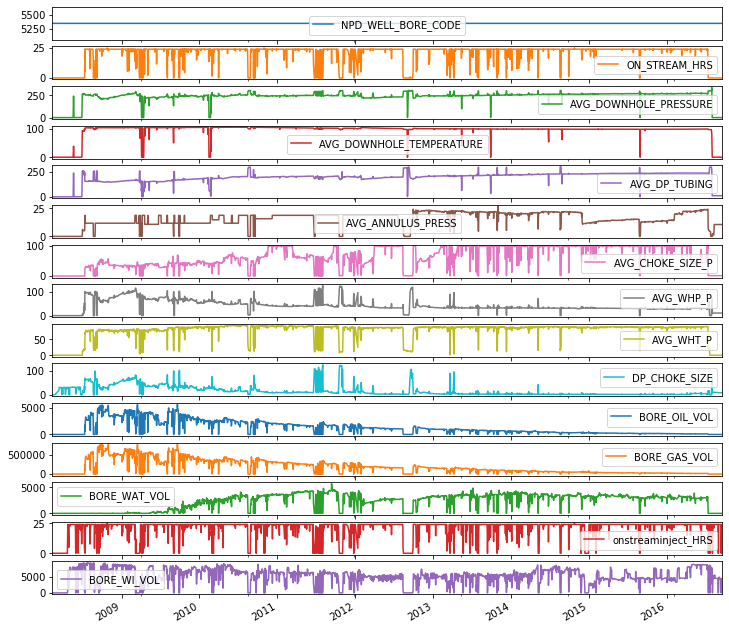

In [5]:
df.plot(subplots=True,figsize=(12,12));

In [6]:
# df.head()

In [7]:
df.columns

Index(['NPD_WELL_BORE_CODE', 'NPD_WELL_BORE_NAME', 'ON_STREAM_HRS',
       'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING',
       'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P',
       'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL',
       'onstreaminject_HRS', 'BORE_WI_VOL'],
      dtype='object')

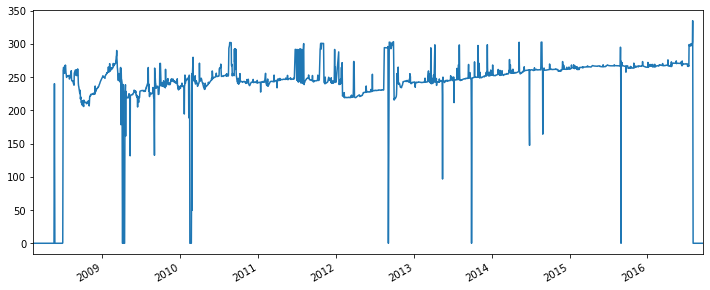

In [8]:
df['AVG_DOWNHOLE_PRESSURE'].plot(figsize=(12,5))

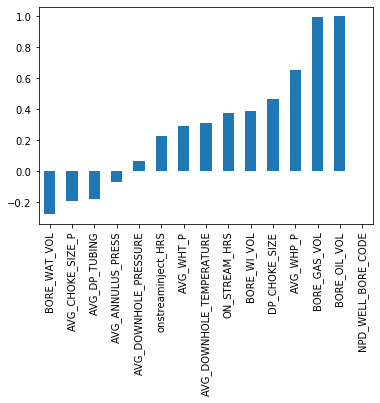

In [9]:
df.corr()['BORE_OIL_VOL'].sort_values().plot(kind='bar')

In [10]:
drops = ['NPD_WELL_BORE_CODE','BORE_GAS_VOL']
df = df.drop(drops,axis=1)
# df.columns


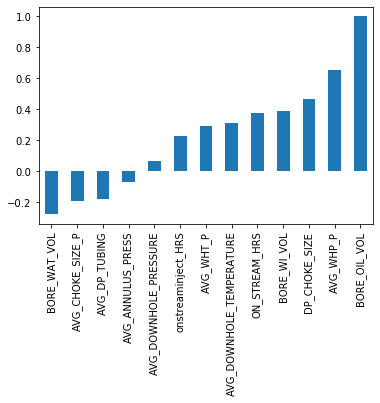

In [11]:
df.corr()['BORE_OIL_VOL'].sort_values().plot(kind='bar')

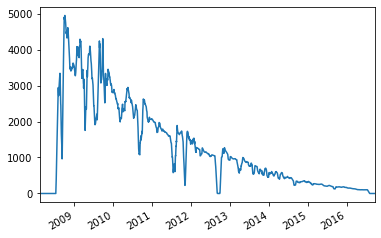

In [12]:
df['BORE_OIL_VOL'] = df['BORE_OIL_VOL'].rolling(window=20).mean()

df['BORE_OIL_VOL'].plot()

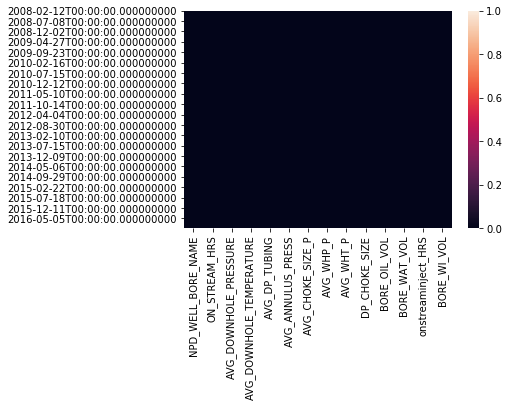

In [13]:
import seaborn as sns 
sns.heatmap(df.isnull())

In [14]:
df['BORE_OIL_VOL'] = df['BORE_OIL_VOL'].fillna(df['BORE_OIL_VOL'].dropna()[0])

In [15]:
# sns.heatmap(df.isnull())

In [16]:
df = df.drop('NPD_WELL_BORE_NAME',axis=1)

In [17]:
df.head()

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_WAT_VOL,onstreaminject_HRS,BORE_WI_VOL
2008-02-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.059,0.0,0,0.0,0.0
2008-02-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.068,0.0,0,0.0,0.0
2008-02-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.050,0.0,0,0.0,0.0
2008-02-15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.066,0.0,0,0.0,0.0
2008-02-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.105,0.0,0,0.0,0.0


In [18]:
df.columns

Index(['ON_STREAM_HRS', 'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE',
       'AVG_DP_TUBING', 'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P', 'AVG_WHP_P',
       'AVG_WHT_P', 'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_WAT_VOL',
       'onstreaminject_HRS', 'BORE_WI_VOL'],
      dtype='object')

In [19]:
# df.info()
df = df.dropna()

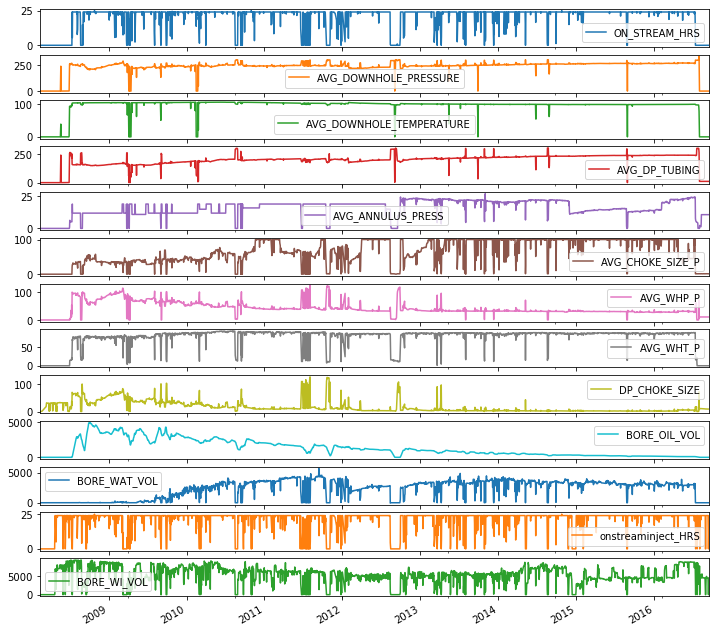

In [20]:
df.plot(subplots=True,figsize=(12,12));

In [21]:
train_fracn = 0.90
end_train = int(train_fracn*len(df))
df_train = df.iloc[:end_train ,:]
df_test = df.iloc[end_train: ,:]

In [22]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()

s.fit(df)

df_train_scaled = df_train.copy()
df_train_scaled.iloc[:,:] = s.transform(df_train)

df_test_scaled = df_test.copy()
df_test_scaled.iloc[:,:] = s.transform(df_test)

In [23]:
def Xysplitter(df,out_col):
    
    idx = np.argwhere(df.columns==out_col)
    
    X = df.drop(out_col,axis=1)
    y = df[out_col]
    
    return X,y

In [24]:
out_col = 'BORE_OIL_VOL'
X_train_scaled , y_train_scaled = Xysplitter(df_train_scaled,out_col)
X_test_scaled , y_test_scaled = Xysplitter(df_test_scaled,out_col)

In [25]:
# from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [26]:
# linreg = LinearRegression()
rf = RandomForestRegressor()

rf.fit(X_train_scaled,y_train_scaled)

RandomForestRegressor()

In [27]:
yp_scaled_test = rf.predict(X_test_scaled)

In [28]:
yp_scaled_train = rf.predict(X_train_scaled)

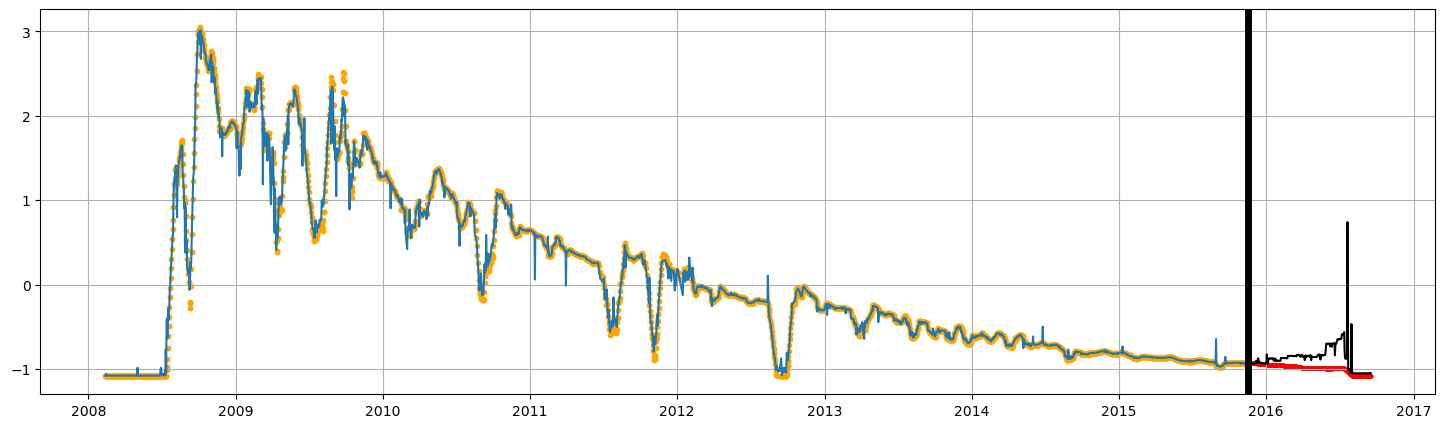

In [29]:
plt.style.use('default')
plt.figure(figsize=(18,5))

plt.scatter(df_train_scaled.index, y_train_scaled,color='orange',s=10)
plt.plot(df_train_scaled.index,yp_scaled_train)



plt.scatter(df_test.index , y_test_scaled,color='red',s=5)
plt.plot(df_test.index , yp_scaled_test , color='black')


plt.axvline(df_test_scaled.index[0], color='black',lw=5)

plt.grid()

In [30]:
# sns.regplot(yp_scaled_test,y_test_scaled)

In [31]:
idx = np.argwhere(df.columns==out_col)[0][0]

In [32]:
# df.columns[idx]
mu = s.mean_[idx] ; std = s.scale_[idx]


def backscaler(y):
    
    return y*std + mu

In [33]:
Y_train = backscaler(y_train_scaled) ; Yp_train = backscaler(yp_scaled_train)

Y_test = backscaler(y_test_scaled) ; Yp_test = backscaler(yp_scaled_test)

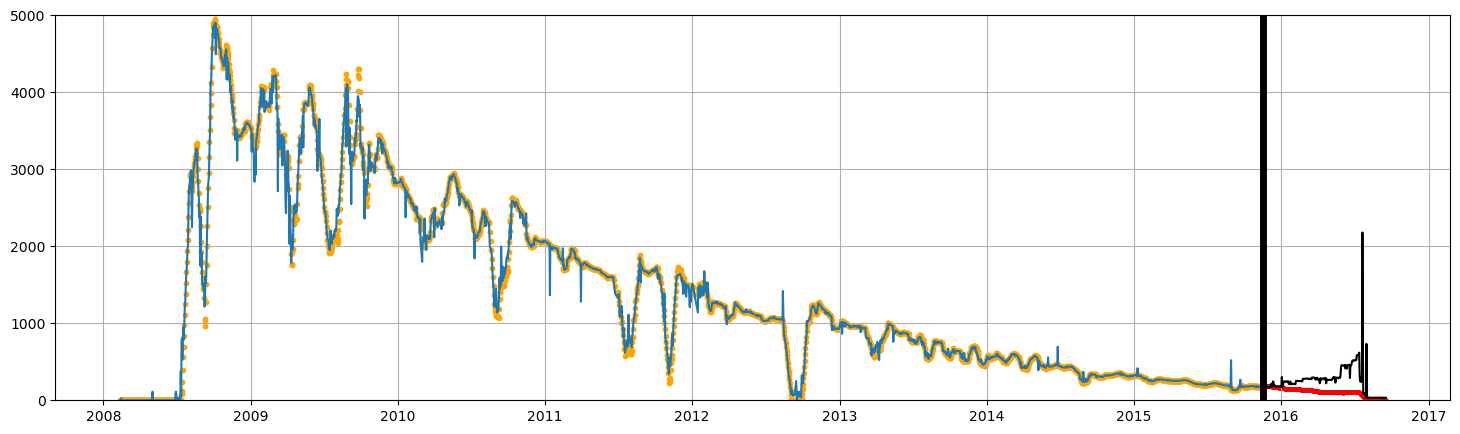

In [34]:
plt.style.use('default')
plt.figure(figsize=(18,5))

plt.scatter(df_train_scaled.index, Y_train,color='orange',s=10)
plt.plot(df_train_scaled.index,Yp_train)



plt.scatter(df_test.index , Y_test,color='red',s=5)
plt.plot(df_test.index , Yp_test , color='black')


plt.axvline(df_test_scaled.index[0], color='black',lw=5)

plt.ylim(0,5000)

plt.grid()